Source Code owners: Jason Brownlee, machinelearningmastery

Referance: 
1. https://machinelearningmastery.com/probability-density-estimation/   
2. https://en.wikipedia.org/wiki/Kernel_density_estimation 
3. https://mathisonian.github.io/kde/
4. http://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/AV0405/MISHRA/kde.html


1. Histogram plots provide a fast and reliable way to visualize the probability density of a data sample.
2. Parametric probability density estimation involves selecting a common distribution and estimating the parameters for the density function from a data sample.
3. Nonparametric probability density estimation involves using a technique to fit a model to the arbitrary distribution of the data, like kernel density estimation.

### Parametric probability density estimation

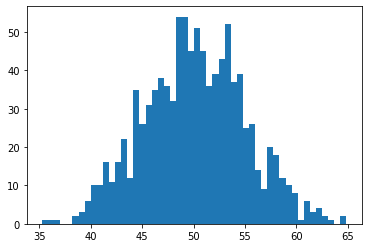

In [2]:
# example of parametric probability density estimation
from matplotlib import pyplot
from numpy.random import normal
from numpy import mean
from numpy import std
from scipy.stats import norm
# generate a sample
sample = normal(loc=50, scale=5, size=1000)
pyplot.hist(sample, bins=50)
pyplot.show()

In [3]:
# calculate parameters
sample_mean = mean(sample)
sample_std = std(sample)
print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))


Mean=50.127, Standard Deviation=4.914


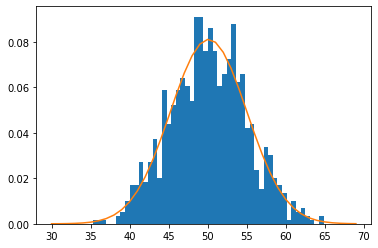

In [4]:
# define the distribution
dist = norm(sample_mean, sample_std)
# sample probabilities for a range of outcomes
values = [value for value in range(30, 70)]
probabilities = [dist.pdf(value) for value in values]
# plot the histogram and pdf
pyplot.hist(sample, bins=50, density=True)
pyplot.plot(values, probabilities)
pyplot.show()

### Nonparametric probability density estimation

*Kernel Density Estimation*: Nonparametric method for using a dataset to estimating probabilities for new points

*Smoothing Parameter (bandwidth)*: Parameter that controls the number of samples or window of samples used to estimate the probability for a new point.

*Basis Function (kernel)*: The function chosen used to control the contribution of samples in the dataset toward estimating the probability of a new point.

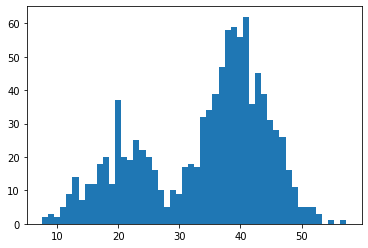

In [5]:
# example of kernel density estimation for a bimodal data sample
from matplotlib import pyplot
from numpy.random import normal
from numpy import hstack
from numpy import asarray
from numpy import exp
from sklearn.neighbors import KernelDensity
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))
# plot the histogram
pyplot.hist(sample, bins=50)
pyplot.show()

In [6]:
# fit density
model = KernelDensity(bandwidth=1, kernel='gaussian')
sample = sample.reshape((len(sample), 1))
model.fit(sample)


KernelDensity(algorithm='auto', atol=0, bandwidth=1, breadth_first=True,
              kernel='gaussian', leaf_size=40, metric='euclidean',
              metric_params=None, rtol=0)

In [7]:
# sample probabilities for a range of outcomes
values = asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values)
probabilities = exp(probabilities)


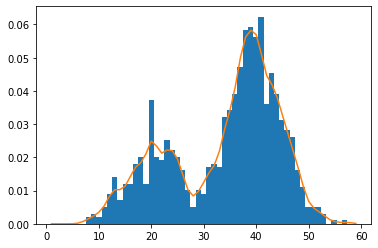

In [8]:
# plot the histogram and pdf
pyplot.hist(sample, bins=50, density=True)
pyplot.plot(values[:], probabilities)
pyplot.show()